In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# Data Preprocessing Or Data Cleaning

In [4]:
# Check for null values
print(df.isnull().sum().sum())

4307


In [5]:
# Check for duplicated rows
print(df.duplicated().sum().sum())

0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df = df.dropna(subset=['date_added']).reset_index(drop=True)

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(),
                                   format="%B %d, %Y")

In [9]:
df['release_month'] = df['date_added'].dt.strftime('%B')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September


In [10]:
df = df.drop(['date_added', 'listed_in', 'description'], axis=1)

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,release_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,September


In [12]:
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"].bfill(inplace=True)
df["rating"].bfill(inplace=True)
df["duration"].bfill(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        8797 non-null   object
 1   type           8797 non-null   object
 2   title          8797 non-null   object
 3   director       8797 non-null   object
 4   cast           8797 non-null   object
 5   country        8797 non-null   object
 6   release_year   8797 non-null   int64 
 7   rating         8797 non-null   object
 8   duration       8797 non-null   object
 9   release_month  8797 non-null   object
dtypes: int64(1), object(9)
memory usage: 687.4+ KB


In [14]:
df.nunique()

show_id          8797
type                2
title            8797
director         4529
cast             7683
country           748
release_year       74
rating             17
duration          220
release_month      12
dtype: int64

# EDA (Exploratory Data Analysis)

In [30]:
df.describe()

,release_year
count,8797.000000
mean,2014.183472
std,8.822191
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Analysics & Data Visualization

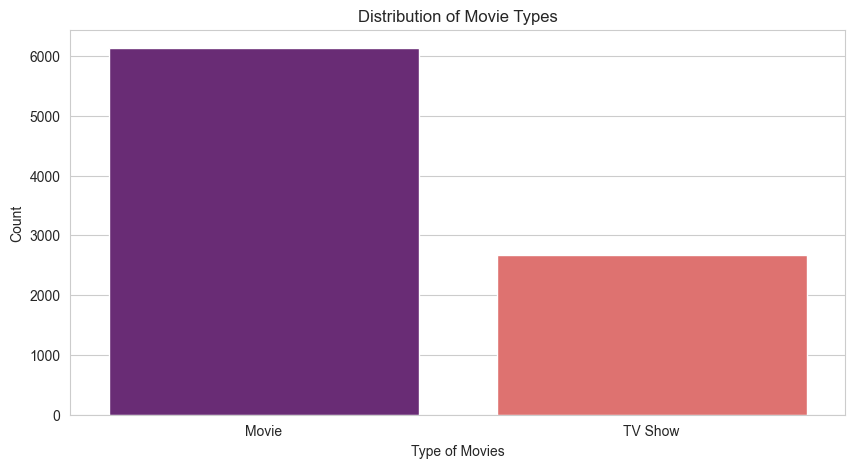

In [15]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(data=df, x='type', palette='magma')
plt.title('Distribution of Movie Types')
plt.xlabel('Type of Movies')
plt.ylabel('Count')
plt.show()

## Counts the occurrences of top 10 Countries.

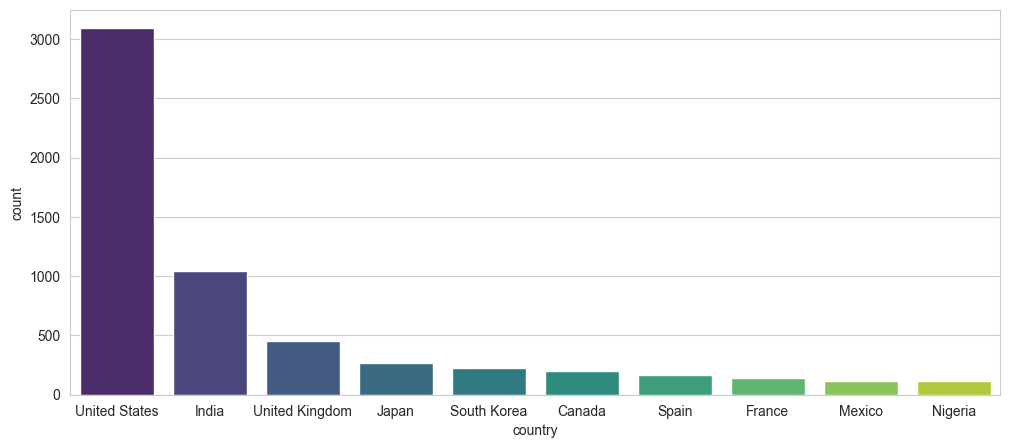

In [17]:
top_countries = df['country'].value_counts().head(10)
top_countries = top_countries.reset_index()
top_countries.columns = ["country", "count"]

plt.figure(figsize=(12,5))
sns.barplot(data=top_countries, x='country', y='count', palette='viridis')
plt.show()

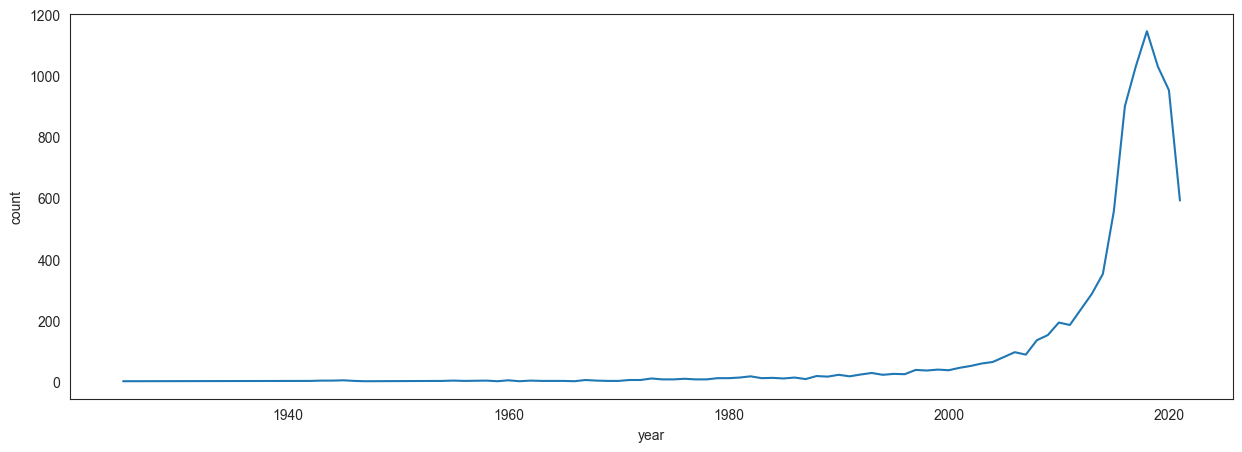

In [32]:
years_release = df["release_year"].value_counts()

years_release = years_release.reset_index()
years_release.columns = ["year", "count"]

sns.set_style('white')
plt.figure(figsize=(15,5))
sns.lineplot(data=years_release, x="year", y="count", markers="o")
plt.show()

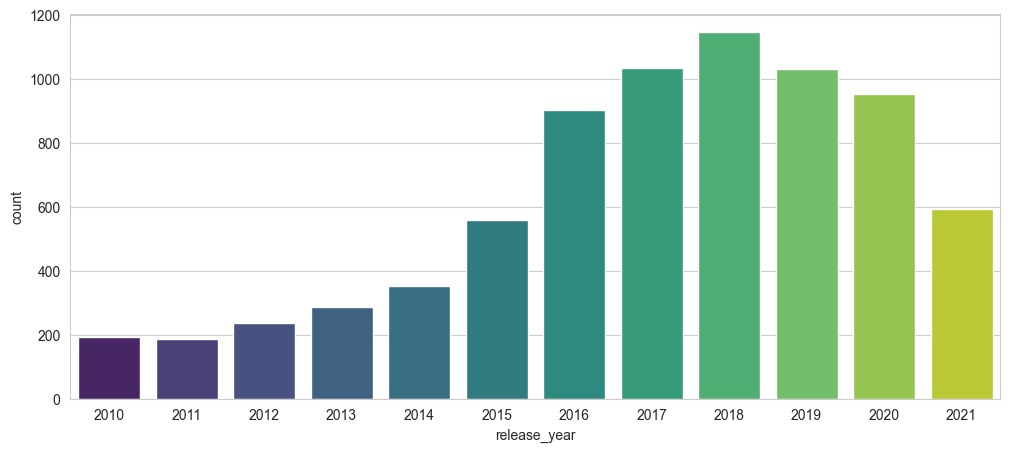

In [18]:
top_moviereleasedyear = df["release_year"].value_counts().head(12)
top_moviereleasedyear = top_moviereleasedyear.reset_index()
top_moviereleasedyear.columns = ["release_year", 'count']

plt.figure(figsize=(12,5))
sns.barplot(data = top_moviereleasedyear, x = "release_year", y="count", palette='viridis')
plt.show()

## Most frequent genre of movies released on Netflix

In [ ]:
genre = df['country'].value_counts(sort=True).head(12)
freq_genre = pd.DataFrame(genre)
freq_genre.columns = ['total_freq']
freq_genre = freq_genre.reset_index()
freq_genre.columns = ['genre', 'total_freq']

In [ ]:
freq_genre['total_freq'][0]

freq_genre['percentage'] = (freq_genre['total_freq'] / freq_genre['total_freq'].sum()) * 100
freq_genre.head(5)

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=freq_genre, x='genre', y = 'total_freq', palette="magma")
plt.title('Distribution of Genre Based On Frequency', fontsize=16)
plt.xlabel('Genre Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=60)
plt.show()

## Which has highest votes avg column?

In [ ]:
df.head(3)

In [ ]:
sns.catplot(y='Vote_Avg', data=df, kind='count',
    order=df['Vote_Avg'].value_counts().index, palette='magma')
plt.title('Distribution Of Votes', fontsize=16)
plt.xlabel('Votes Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## What movie got the highest popularity? What's its genre?

In [ ]:
df.head(2)

In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

## What movie got the lowest popularity? What's its genre?

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

## Which year has the most filmmed movies?

In [ ]:
year = df['Release_Year'].value_counts().head(10)
release_year = pd.DataFrame(year)
release_year = release_year.reset_index()

release_year.columns = ['year', 'count']


In [ ]:
plt.figure(figsize=(10, 6))
explode = [0.1 if i == release_year['count'].max() else 0 for i in release_year['count']]
plt.pie(
    release_year['count'],
    labels=release_year['year'],
    autopct='%1.1f%%',            
    startangle=140,              
    explode=explode,              
    shadow=True                  
)
plt.title('Movie Releases By Year', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()

## Total Movie Count per Release Month by Average Vote

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Release_Month', hue='Vote_Avg', order=month_order, palette='magma')
plt.title('Movie Count per Release Month by Average Vote', fontsize=16)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 movies based on their popularity release on the Netflix

In [ ]:
top_10_movies = df.sort_values(by='Popularity', ascending=False).head(10)
top_10_movies[['Title', 'Popularity']].head(5)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_movies, x='Title', y='Popularity', palette='magma')
plt.title('Top 10 movies Based on their Popularity', fontsize=16)
plt.xlabel('Movies Title/Names', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Q1: What is the most frequent genre in the dataset?
#### Drama genre is the most frequent genre in our dataset and has appeared more than 18.92% of the times among 19 other genres.

### Q2: What genres has highest votes?
#### We have 25.5% of our dataset with not popular vote (2560 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

### Q3: What movie got the highest popularity ? what's its genre?
#### Spider-Man; No Way Home has the highest popularity rate in our dataset and it has genres of Action , Adventure and Sience Fiction .

### Q4: What movie got the lowest popularity ? what's its genre?
#### The united states, thread' has the highest lowest rate in our dataset 'sci-fi' and history'. and it has genres of music , drama 'war'

### Q5: Which year has the most filmmed movies?
#### Year 2020 has the highest filmming rate in our dataset.